<a href="https://colab.research.google.com/github/MissNeerajSharma/Data_Visualization_using_Python/blob/master/SampleFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Play Store Dataset  EDA

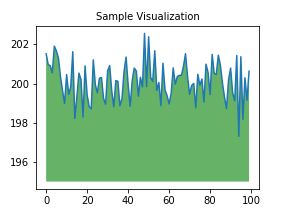

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<ipython-input-1-40b3156d35ea>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


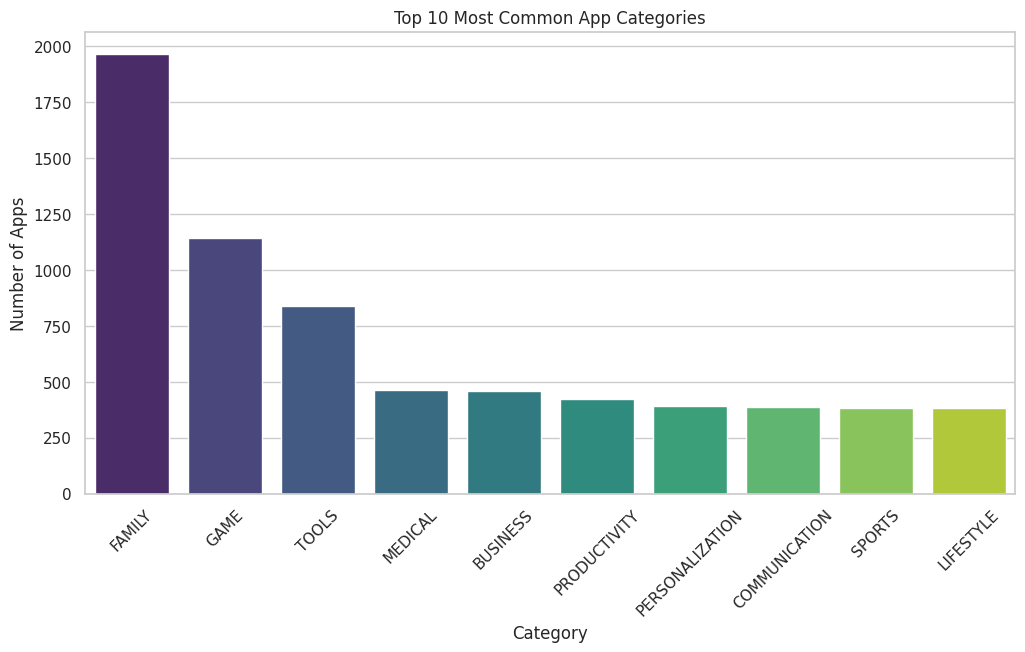

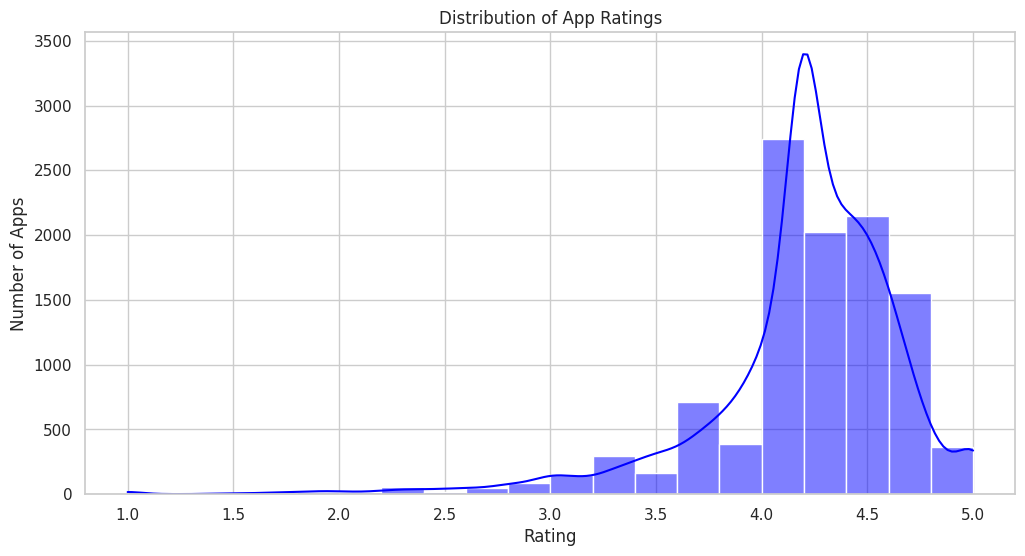

<ipython-input-1-40b3156d35ea>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Size', data=df, palette='rainbow', showfliers=False)


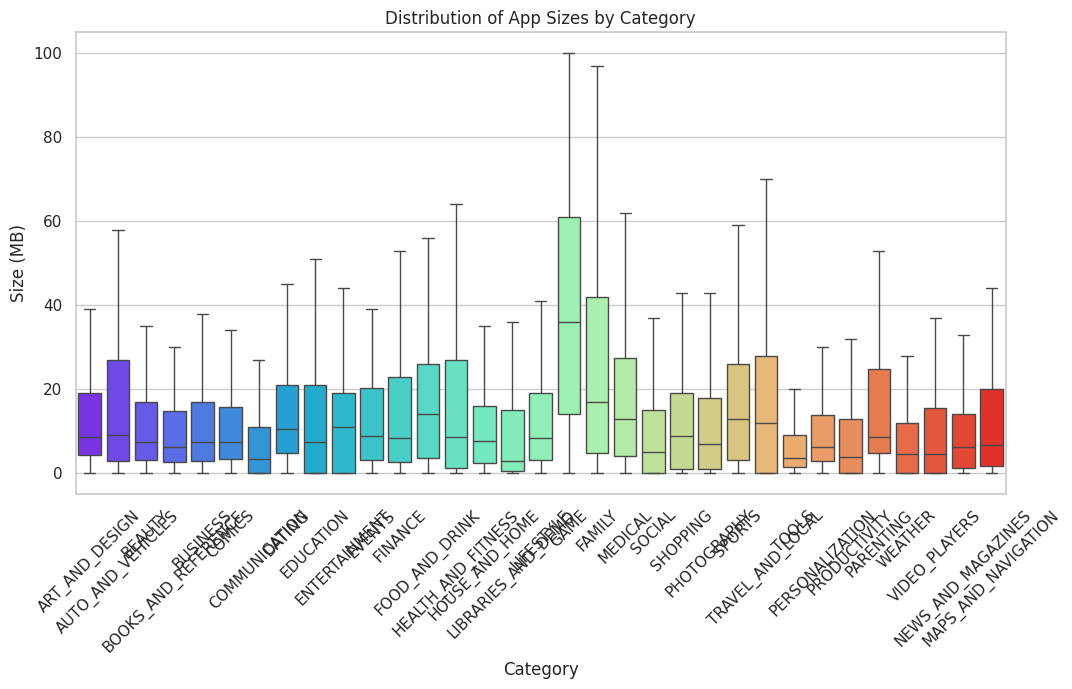

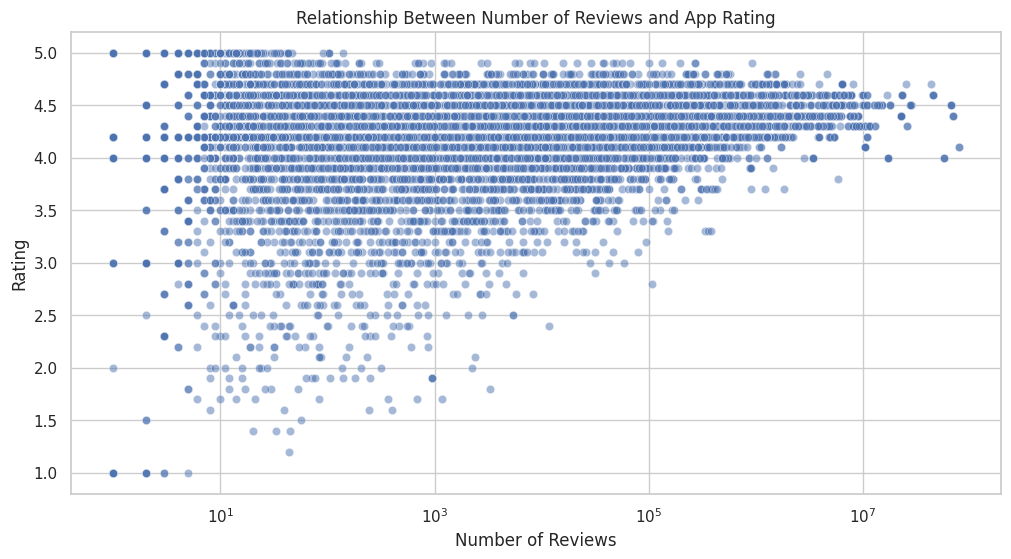

<ipython-input-1-40b3156d35ea>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


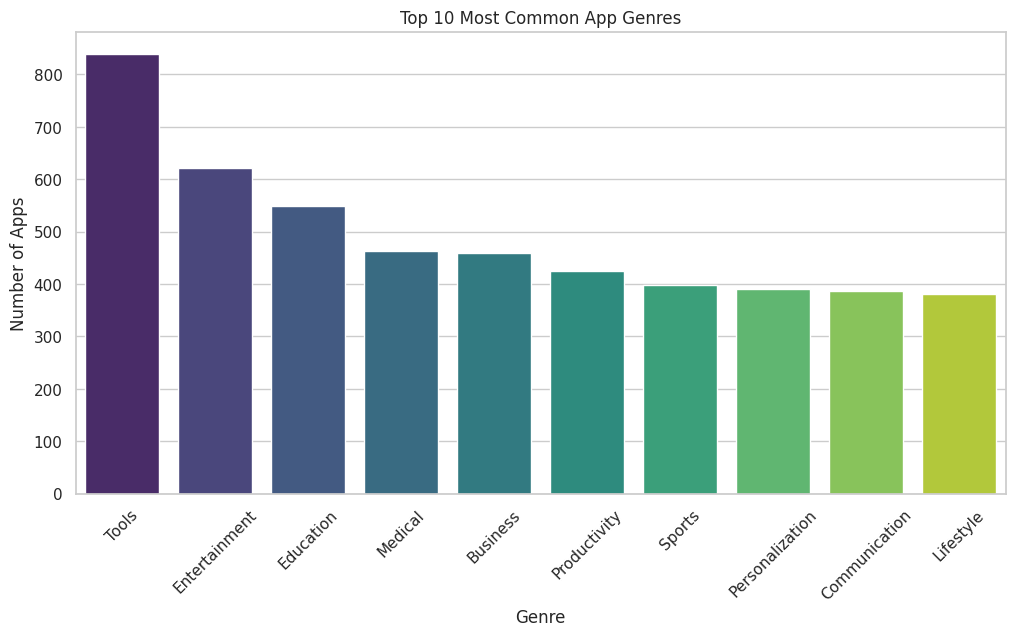

<ipython-input-1-40b3156d35ea>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Rating', data=df, palette='coolwarm')


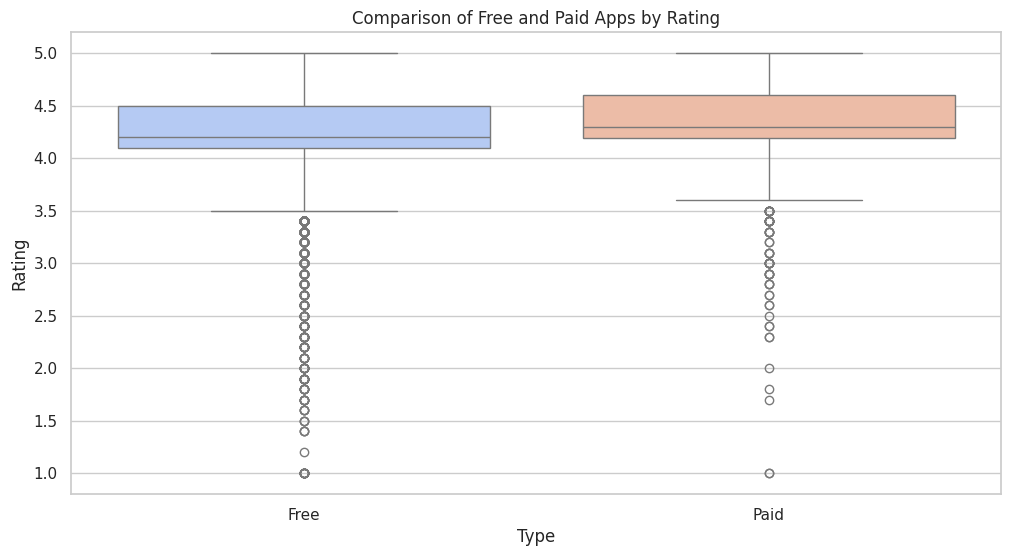

<ipython-input-1-40b3156d35ea>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Installs', data=df, palette='coolwarm', showfliers=False)


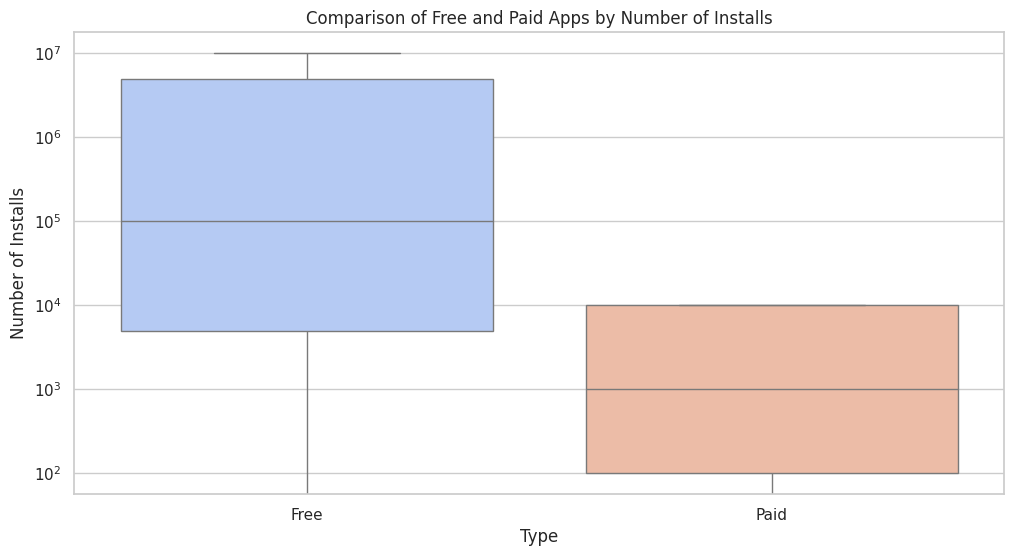

<ipython-input-1-40b3156d35ea>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
<ipython-input-1-40b3156d35ea>:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Size', data=df, palette='rainbow', showfliers=False)
<ipython-input-1-40b3156d35ea>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
<ipython-input-1-40b3156d35ea>:169: FutureWarning: 

Passing `palette` without assigning `hue` is

In [1]:
import pandas as pd

# Load the CSV file
file_path = '/content/googleplaystore.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its summary
df.head(), df.info()

# Cleaning and preprocessing the data

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Size' to numeric (in MB), handling "Varies with device"
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '').replace('k', 'e-3') if 'Varies with device' not in x else '0')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Convert 'Installs' to numeric, remove commas and plus sign
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '').replace('+', ''))
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Remove dollar sign and convert 'Price' to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', ''))
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()

# Fill missing values in 'Rating' with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Drop rows with missing 'Type', 'Content Rating', 'Current Ver', 'Android Ver'
df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

# Summary of cleaned data
cleaned_summary = df.describe()

missing_values, cleaned_summary

import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# 1. Most common categories of apps
category_counts = df['Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Top 10 Most Common App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

# 2. Distribution of app ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

# 3. Variation of app sizes across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size', data=df, palette='rainbow', showfliers=False)
plt.title('Distribution of App Sizes by Category')
plt.xlabel('Category')
plt.ylabel('Size (MB)')
plt.xticks(rotation=45)
plt.show()

# 4. Relationship between number of reviews and app rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, alpha=0.5)
plt.title('Relationship Between Number of Reviews and App Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

# 5. Most common genres
genre_counts = df['Genres'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Most Common App Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

# 6. Comparison of free and paid apps in terms of ratings and number of installs
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rating', data=df, palette='coolwarm')
plt.title('Comparison of Free and Paid Apps by Rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Installs', data=df, palette='coolwarm', showfliers=False)
plt.title('Comparison of Free and Paid Apps by Number of Installs')
plt.xlabel('Type')
plt.ylabel('Number of Installs')
plt.yscale('log')
plt.show()
# Saving the plots as images

# Create an 'images' directory if it doesn't exist
import os

os.makedirs('/mnt/data/images', exist_ok=True)

# 1. Most common categories of apps
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Top 10 Most Common App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.savefig('/mnt/data/images/top_10_categories.png')
plt.close()

# 2. Distribution of app ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.savefig('/mnt/data/images/rating_distribution.png')
plt.close()

# 3. Variation of app sizes across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size', data=df, palette='rainbow', showfliers=False)
plt.title('Distribution of App Sizes by Category')
plt.xlabel('Category')
plt.ylabel('Size (MB)')
plt.xticks(rotation=45)
plt.savefig('/mnt/data/images/size_variation.png')
plt.close()

# 4. Relationship between number of reviews and app rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, alpha=0.5)
plt.title('Relationship Between Number of Reviews and App Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xscale('log')
plt.savefig('/mnt/data/images/reviews_vs_rating.png')
plt.close()

# 5. Most common genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Most Common App Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.savefig('/mnt/data/images/top_10_genres.png')
plt.close()

# 6. Comparison of free and paid apps in terms of ratings and number of installs
# Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rating', data=df, palette='coolwarm')
plt.title('Comparison of Free and Paid Apps by Rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.savefig('/mnt/data/images/free_vs_paid_rating.png')
plt.close()

# Installs
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Installs', data=df, palette='coolwarm', showfliers=False)
plt.title('Comparison of Free and Paid Apps by Number of Installs')
plt.xlabel('Type')
plt.ylabel('Number of Installs')
plt.yscale('log')
plt.savefig('/mnt/data/images/free_vs_paid_installs.png')
plt.close()